In [ ]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings('ignore')


In [ ]:
df=pd.read_csv('GlobalLandTemperaturesByState.csv')
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [ ]:
df.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
State                             object
Country                           object
dtype: object

In [ ]:
df.shape

(23270, 5)

In [ ]:
df.isnull().sum()

dt                                  0
AverageTemperature               1207
AverageTemperatureUncertainty    1207
State                               1
Country                             1
dtype: int64

In [ ]:
df=df.dropna(how='any',axis=0)

In [ ]:
df.shape

(22063, 5)

In [ ]:
df.rename(columns={'dt':'date','AverageTemperature':'avg_temp','AverageTemperatureUncertainty':'avg_confidence'},inplace=True)
df.head()

,date,avg_temp,avg_confidence,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [ ]:
df['date']=pd.to_datetime(df['date'])
df.set_index('date',inplace=True)
df.index

DatetimeIndex(['1855-05-01', '1855-06-01', '1855-07-01', '1855-08-01',
               '1855-09-01', '1855-10-01', '1855-11-01', '1855-12-01',
               '1856-01-01', '1856-02-01',
               ...
               '1892-12-01', '1893-01-01', '1893-02-01', '1893-03-01',
               '1893-04-01', '1893-05-01', '1893-06-01', '1893-07-01',
               '1893-08-01', '1893-09-01'],
              dtype='datetime64[ns]', name='date', length=22063, freq=None)

In [ ]:
df.describe()

,avg_temp,avg_confidence
count,22063.000000,22063.000000
mean,9.556622,1.312200
std,15.438124,1.301319
min,-36.454000,0.052000
25%,-0.247500,0.348000
50%,12.562000,0.746000
75%,24.456000,1.970500
max,32.289000,11.240000


In [ ]:
df['year']=df.index.year
df.head()

,avg_temp,avg_confidence,State,Country,year
date,,,,,
1855-05-01,25.544,1.171,Acre,Brazil,1855
1855-06-01,24.228,1.103,Acre,Brazil,1855
1855-07-01,24.371,1.044,Acre,Brazil,1855
1855-08-01,25.427,1.073,Acre,Brazil,1855
1855-09-01,25.675,1.014,Acre,Brazil,1855


In [ ]:
df.describe()

,avg_temp,avg_confidence,year
count,22063.000000,22063.000000,22063.000000
mean,9.556622,1.312200,1908.671622
std,15.438124,1.301319,63.572522
min,-36.454000,0.052000,1743.000000
25%,-0.247500,0.348000,1861.000000
50%,12.562000,0.746000,1911.000000
75%,24.456000,1.970500,1962.000000
max,32.289000,11.240000,2013.000000


In [ ]:
latest_df=df.loc['1980':'2013']
latest_df.head()

,avg_temp,avg_confidence,State,Country,year
date,,,,,
1980-01-01,26.652,0.190,Acre,Brazil,1980
1980-02-01,26.495,0.495,Acre,Brazil,1980
1980-03-01,26.270,0.236,Acre,Brazil,1980
1980-04-01,26.430,0.201,Acre,Brazil,1980
1980-05-01,25.802,0.882,Acre,Brazil,1980


In [ ]:
latest_df[['Country','avg_temp']].groupby(['Country']).mean().sort_values('avg_temp')

,avg_temp
Country,
Canada,1.078326
Russia,3.994673
United States,6.927507
Brazil,26.158912


In [ ]:
import seaborn as sns

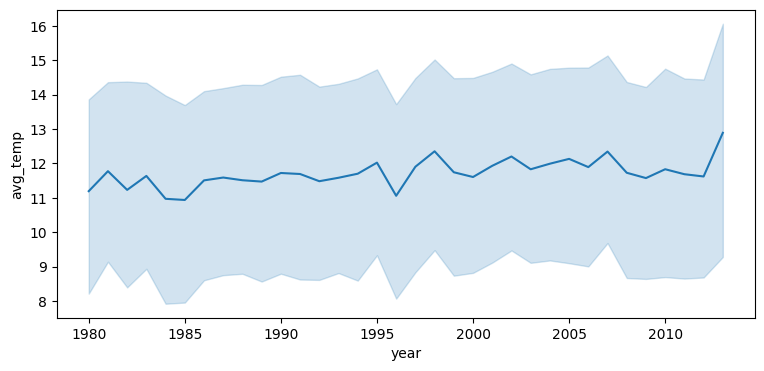

In [ ]:
plt.figure(figsize=(9,4))
sns.lineplot(x='year',y='avg_temp',data=latest_df)
plt.show()

In [ ]:
resample_df=latest_df[['avg_temp']].resample('A').mean()

In [ ]:
resample_df.head()

,avg_temp
date,
1980-12-31,11.194657
1981-12-31,11.775333
1982-12-31,11.231870
1983-12-31,11.637870
1984-12-31,10.972380


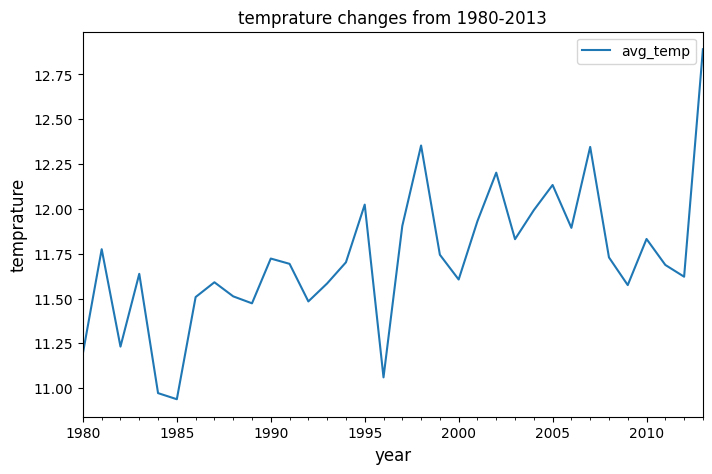

In [ ]:
resample_df.plot(title='temprature changes from 1980-2013',figsize=(8,5))
plt.xlabel('year', fontsize=12)
plt.ylabel('temprature', fontsize=12)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

print('Dickey fuller test results: ')
test_df = adfuller(resample_df.iloc[:,0].values,autolag='AIC')
df_output=pd.Series(test_df[0:4],index=['test statistic','p-value','lag used','number of observation'])
for key,value in test_df[4].items():
  df_output['critical value (%s)' %key]=value
  print(df_output)

Dickey fuller test results: 
test statistic           -3.629288
p-value                   0.005225
lag used                  0.000000
number of observation    33.000000
critical value (1%)      -3.646135
dtype: float64
test statistic           -3.629288
p-value                   0.005225
lag used                  0.000000
number of observation    33.000000
critical value (1%)      -3.646135
critical value (5%)      -2.954127
dtype: float64
test statistic           -3.629288
p-value                   0.005225
lag used                  0.000000
number of observation    33.000000
critical value (1%)      -3.646135
critical value (5%)      -2.954127
critical value (10%)     -2.615968
dtype: float64


In [ ]:

decomp=seasonal_decompose(resample_df,period=3)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

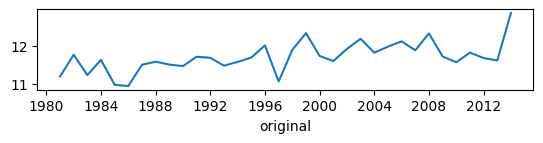

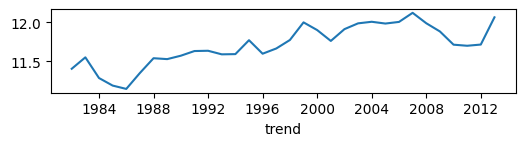

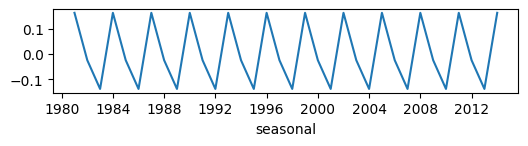

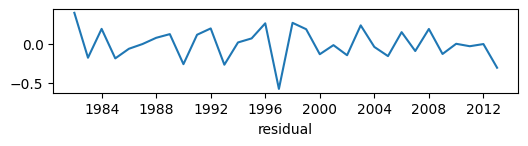

<Figure size 600x500 with 0 Axes>

In [ ]:
plt.subplot(411)
plt.plot(resample_df)
plt.xlabel('original')
plt.figure(figsize=(6,5))

plt.subplot(412)
plt.plot(trend)
plt.xlabel('trend')
plt.figure(figsize=(6,5))

plt.subplot(413)
plt.plot(seasonal)
plt.xlabel('seasonal')
plt.figure(figsize=(6,5))

plt.subplot(411)
plt.plot(residual)
plt.xlabel('residual')
plt.figure(figsize=(6,5))

plt.tight_layout()

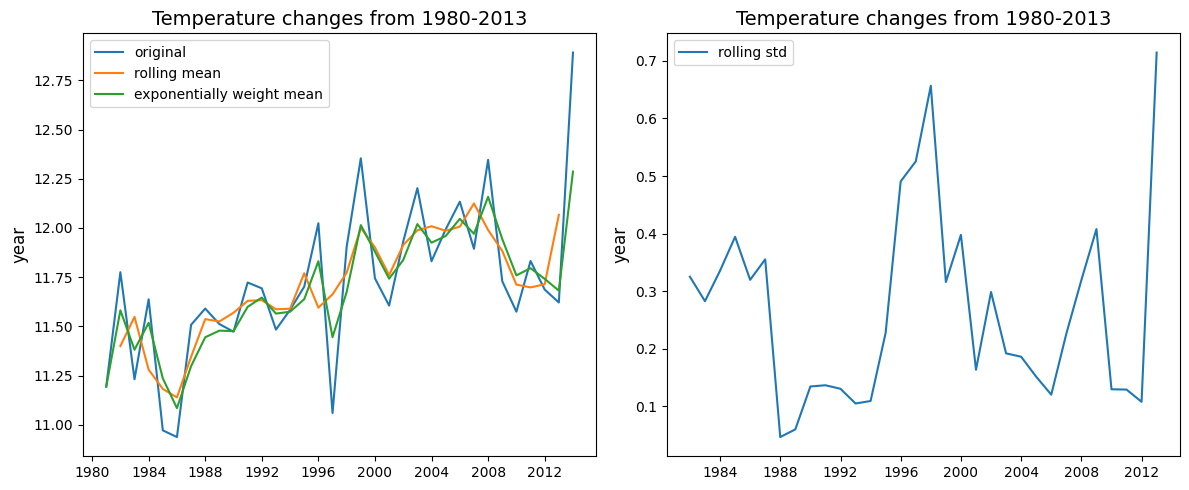

In [ ]:
rol_mean=resample_df.rolling(window=3,center=True).mean()

ewm=resample_df.ewm(span=3).mean()

rol_std=resample_df.rolling(window=3,center=True).std()

fig,(ax1, ax2)=plt.subplots(1,2, figsize=(12,5))

ax1.plot(resample_df,label='original')
ax1.plot(rol_mean,label='rolling mean')
ax1.plot(ewm,label='exponentially weight mean')
ax1.set_title('Temperature changes from 1980-2013',fontsize=14)
ax1.set_ylabel('temperature',fontsize=12)
ax1.set_ylabel('year',fontsize=12)
ax1.legend()

ax2.plot(rol_std,label='rolling std')
ax2.set_title('Temperature changes from 1980-2013',fontsize=14)
ax2.set_ylabel('temperature',fontsize=12)
ax2.set_ylabel('year',fontsize=12)
ax2.legend()

plt.tight_layout()
plt.show()

In [ ]:
rol_mean.dropna(inplace=True)
ewm.dropna(inplace=True)

print('Dickey fuller test the rolling mean: ')
df_test = adfuller(rol_mean.iloc[:,0].values,autolag='AIC')
df_output=pd.Series(test_df[0:4],index=['test statistic','p-value','lag used','number of observation'])
for key,value in test_df[4].items():
  df_output['critical value (%s)' %key]=value
print(df_output)
print('Dickey fuller test for the exponentially weight ,mean: ')
test_df = adfuller(ewm.iloc[:,0].values,autolag='AIC')
df_output=pd.Series(test_df[0:4],index=['test statistic','p-value','lag used','number of observation'])
for key,value in test_df[4].items():
  df_output['critical value (%s)' %key]=value
print(df_output)


Dickey fuller test the rolling mean: 
test statistic           -3.629288
p-value                   0.005225
lag used                  0.000000
number of observation    33.000000
critical value (1%)      -3.646135
critical value (5%)      -2.954127
critical value (10%)     -2.615968
dtype: float64
Dickey fuller test for the exponentially weight ,mean: 
test statistic           -1.052240
p-value                   0.733738
lag used                  2.000000
number of observation    31.000000
critical value (1%)      -3.661429
critical value (5%)      -2.960525
critical value (10%)     -2.619319
dtype: float64


In [ ]:
diff_rol_mean=resample_df - rol_mean
diff_rol_mean.dropna(inplace=True)
diff_rol_mean.head()

,avg_temp
date,
1981-12-31,0.374713
1982-12-31,-0.316488
1983-12-31,0.357164
1984-12-31,-0.210500
1985-12-31,-0.201293


In [ ]:
diff_ewm=resample_df - ewm
diff_ewm.dropna(inplace=True)
diff_ewm.head()

,avg_temp
date,
1980-12-31,0.000000
1981-12-31,0.193559
1982-12-31,-0.149959
1983-12-31,0.119486
1984-12-31,-0.264196


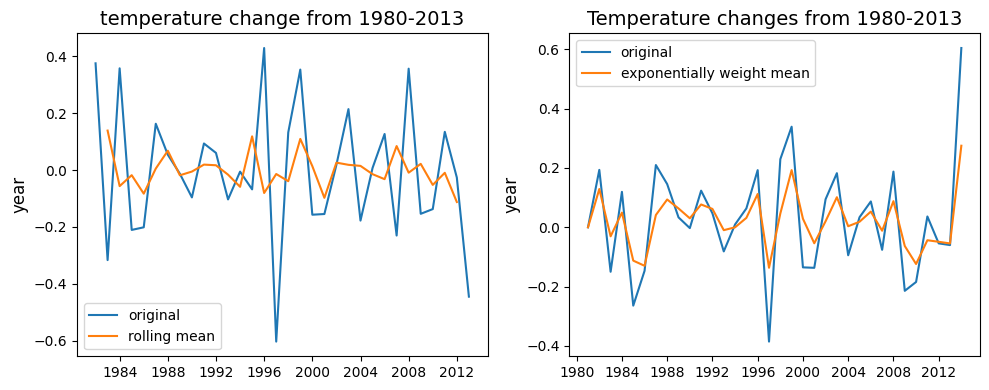

In [ ]:
df_rol_mean_diff=diff_rol_mean.rolling(window=3, center=True).mean()

df_ewm_diff=diff_ewm.ewm(span=3).mean()

fig, (ax1,ax2)=plt.subplots(1,2, figsize=(10,4))

ax1.plot(diff_rol_mean,label='original')
ax1.plot(df_rol_mean_diff,label='rolling mean')
ax1.set_title('temperature change from 1980-2013',fontsize=14)
ax1.set_ylabel('temperature',fontsize=12)
ax1.set_ylabel('year',fontsize=12)
ax1.legend()

ax2.plot(diff_ewm,label='original')
ax2.plot(df_ewm_diff,label='exponentially weight mean')
ax2.set_title('Temperature changes from 1980-2013',fontsize=14)
ax2.set_ylabel('temperature',fontsize=12)
ax2.set_ylabel('year',fontsize=12)
ax2.legend()

plt.tight_layout()

In [ ]:
print('dickey fulller test for the difference between the orginal and rolling mean: ')
dftest=adfuller(diff_rol_mean.iloc[:,0].values, autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['test statistics','p value','lags used','number of observation'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key] = value
print(df_output)
print('Dickey fuller test for the exponentially weight ,mean: ')
dftest=adfuller(diff_ewm.iloc[:,0].values, autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['test statistics','p value','lags used','number of observation'])
for key,value in dftest[4].items():
  df_output['critical value (%s)' %key]=value
print(df_output)

dickey fulller test for the difference between the orginal and rolling mean: 
test statistic           -1.052240
p-value                   0.733738
lag used                  2.000000
number of observation    31.000000
critical value (1%)      -3.661429
critical value (5%)      -2.960525
critical value (10%)     -2.619319
dtype: float64
Dickey fuller test for the exponentially weight ,mean: 
test statistic           -1.052240
p-value                   0.733738
lag used                  2.000000
number of observation    31.000000
critical value (1%)      -3.653520
critical value (5%)      -2.957219
critical value (10%)     -2.617588
dtype: float64


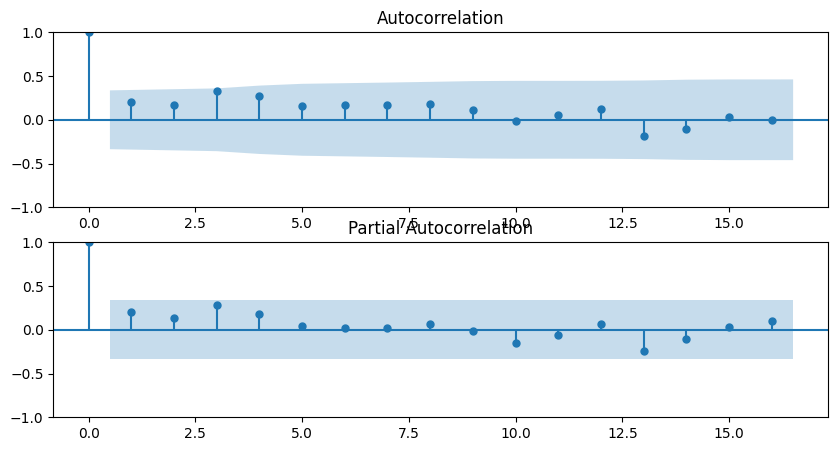

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

pyplot.figure(figsize=(10,5))
pyplot.subplot(211)
plot_acf(resample_df,ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(resample_df, ax=pyplot.gca())
pyplot.show()